TASK 2 : UNEMPLOYMENT ANALYSIS WITH PYTHON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import calendar
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Darshit\OneDrive\Desktop\OIBSIP\Task 2\Unemployment in India.csv')

In [3]:
def data_info(df,head=5):
    print(55*"-" + "Data Size".center(20) + 55*"-")
    print(f'Data Size: {df.size}')
    print("\n" + 55*"-" + "Data Shape".center(20) + 55*"-")
    print(f'\nThe dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print("\n" + 50*"-" + "The first 5 rows of data".center(30) + 50*"-")
    print(df.head())
    print("\n" + 50 * "-" + "The last 5 rows of data".center(30) + 50 * "-")
    print(df.tail())
    print("\n" + 40*"-" + "Listing all the columns in the dataframe".center(50) + 40*"-")
    print(df.columns)
    print("\n" + 40*"-" + "Total number of unique values in each column".center(50) + 40*"-")
    print(df.nunique())
    print("\n" + 45*"-" + "Information about the dataframe".center(40) + 45*"-")
    print(df.info())
    print("\n" + 35 * "-" + "Checking Statistical Summary for numeric columns".center(60) + 35 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).round(2))
    print("\n" + 40 * "-" + "Checking Statistical Summary for all columns".center(55) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99], include='all').round(2))
    
data_info(df)

-------------------------------------------------------     Data Size      -------------------------------------------------------
Data Size: 5376

-------------------------------------------------------     Data Shape     -------------------------------------------------------

The dataframe consists of 768 rows and 7 columns

--------------------------------------------------   The first 5 rows of data   --------------------------------------------------
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)

In [4]:
df.duplicated().sum()

np.int64(27)

In [5]:
df[df.duplicated()]

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
360    NaN   NaN        NaN                               NaN   
361    NaN   NaN        NaN                               NaN   
362    NaN   NaN        NaN                               NaN   
363    NaN   NaN        NaN                               NaN   
364    NaN   NaN        NaN                               NaN   
365    NaN   NaN        NaN                               NaN   
366    NaN   NaN        NaN                               NaN   
367    NaN   NaN        NaN                               NaN   
368    NaN   NaN        NaN                               NaN   
369    NaN   NaN        NaN                               NaN   
370    NaN   NaN        NaN                               NaN   
371    NaN   NaN        NaN                               NaN   
372    NaN   NaN        NaN                               NaN   
754    NaN   NaN        NaN                               NaN   
755    NaN   NaN        NaN                               NaN   
756    NaN   NaN        NaN                               NaN   
757    NaN   NaN        NaN                               NaN   
758    NaN   NaN        NaN                               NaN   
759    NaN   NaN        NaN                               NaN   
760    NaN   NaN        NaN                               NaN   
761    NaN   NaN        NaN                               NaN   
762    NaN   NaN        NaN                               NaN   
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
360                  NaN                                       NaN  NaN  
361                  NaN                                       NaN  NaN  
362                  NaN                                       NaN  NaN  
363                  NaN                                       NaN  NaN  
364                  NaN                                       NaN  NaN  
365                  NaN                                       NaN  NaN  
366                  NaN                                       NaN  NaN  
367                  NaN                                       NaN  NaN  
368                  NaN                                       NaN  NaN  
369                  NaN                                       NaN  NaN  
370                  NaN                                       NaN  NaN  
371                  NaN                                       NaN  NaN  
372                  NaN                                       NaN  NaN  
754                  NaN                                       NaN  NaN  
755                  NaN                                       NaN  NaN  
756                  NaN                                       NaN  NaN  
757                  NaN                                       NaN  NaN  
758                  NaN                                       NaN  NaN  
759                  NaN                                       NaN  NaN  
760                  NaN                                       NaN  NaN  
761                  NaN                                       NaN  NaN  
762                  NaN                                       NaN  NaN  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN

In [6]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_df['Percentage'] = result_df['Percentage'].astype(str) + '%'

    return result_df


result = missing_values_percent(df)
result

Missing Values Percentage
Region                                                28      3.65%
 Date                                                 28      3.65%
 Frequency                                            28      3.65%
 Estimated Unemployment Rate (%)                      28      3.65%
 Estimated Employed                                   28      3.65%
 Estimated Labour Participation Rate (%)              28      3.65%
Area                                                  28      3.65%

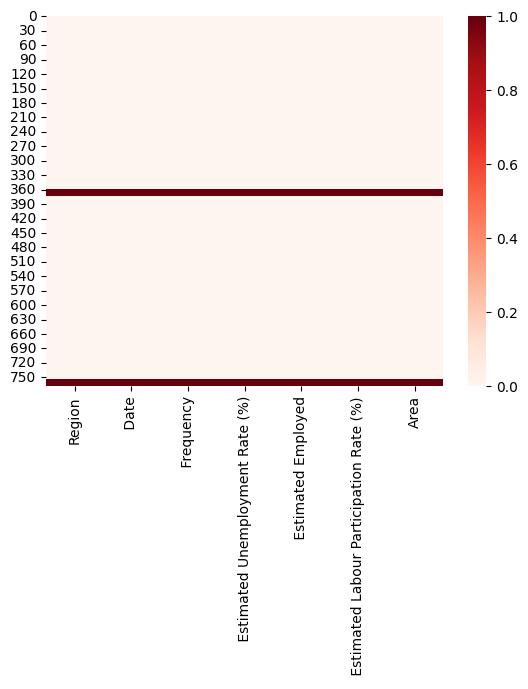

In [7]:
sns.heatmap(df.isnull(),cmap="Reds");

In [8]:
df = df.dropna()
df.shape

(740, 7)

In [9]:
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']

Object columns in the dataframe: ['Region', ' Date', ' Frequency', 'Area']


In [10]:
for i in df:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Region column are: 28
No. of unique values in  Date column are: 14
No. of unique values in  Frequency column are: 2
No. of unique values in  Estimated Unemployment Rate (%) column are: 624
No. of unique values in  Estimated Employed column are: 740
No. of unique values in  Estimated Labour Participation Rate (%) column are: 626
No. of unique values in Area column are: 2


In [11]:
print(f"Unique Values for categorical columns:")
for col in df.select_dtypes(include='object'):
  print(f"  - {col}: {df[col].unique()}\n")

Unique Values for categorical columns:
  - Region: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']

  -  Date: [' 31-05-2019' ' 30-06-2019' ' 31-07-2019' ' 31-08-2019' ' 30-09-2019'
 ' 31-10-2019' ' 30-11-2019' ' 31-12-2019' ' 31-01-2020' ' 29-02-2020'
 ' 31-03-2020' ' 30-04-2020' ' 31-05-2020' ' 30-06-2020']

  -  Frequency: [' Monthly' 'Monthly']

  - Area: ['Rural' 'Urban']



In [12]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Karnataka           28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Maharashtra         28
Madhya Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Odisha              28
Rajasthan           28
Punjab              28
Telangana           28
Tamil Nadu          28
Uttarakhand         27
Meghalaya           27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [13]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [14]:
df[' Date'].value_counts()

 Date
31-10-2019    55
30-11-2019    55
30-06-2019    54
31-07-2019    54
31-05-2019    54
31-08-2019    53
31-01-2020    53
31-12-2019    53
29-02-2020    53
30-09-2019    52
31-03-2020    52
30-04-2020    51
31-05-2020    51
30-06-2020    50
Name: count, dtype: int64

In [15]:
df[' Frequency'].value_counts()

 Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [16]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area']
df.head()

States         Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh   31-05-2019   Monthly                         3.65   
1  Andhra Pradesh   30-06-2019   Monthly                         3.05   
2  Andhra Pradesh   31-07-2019   Monthly                         3.75   
3  Andhra Pradesh   31-08-2019   Monthly                         3.32   
4  Andhra Pradesh   30-09-2019   Monthly                         5.17   

   Estimated Employed  Estimated Labour Participation Rate   Area  
0          11999139.0                                43.24  Rural  
1          11755881.0                                42.05  Rural  
2          12086707.0                                43.50  Rural  
3          12285693.0                                43.97  Rural  
4          12256762.0                                44.68  Rural

In [17]:
df.columns = df.columns.str.strip()
df['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [18]:
df["Frequency"]=df["Frequency"].str.strip()
df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [19]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [22]:
df['Frequency'] = df['Frequency'].astype('category')
df['Area'] = df['Area'].astype('category')

In [23]:
df['Month'] = df['Date'].dt.month
df["Year"] = df["Date"].dt.year

In [24]:
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [25]:
df.drop(columns='Month', inplace=True)
df.head()

States       Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh 2019-05-31   Monthly                         3.65   
1  Andhra Pradesh 2019-06-30   Monthly                         3.05   
2  Andhra Pradesh 2019-07-31   Monthly                         3.75   
3  Andhra Pradesh 2019-08-31   Monthly                         3.32   
4  Andhra Pradesh 2019-09-30   Monthly                         5.17   

   Estimated Employed  Estimated Labour Participation Rate   Area  Year  \
0          11999139.0                                43.24  Rural  2019   
1          11755881.0                                42.05  Rural  2019   
2          12086707.0                                43.50  Rural  2019   
3          12285693.0                                43.97  Rural  2019   
4          12256762.0                                44.68  Rural  2019   

   Month_int Month_name  
0          5        May  
1          6        Jun  
2          7        Jul  
3          8        Aug  
4          9        Sep

In [26]:
df["Month_name"].unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'], dtype=object)

In [27]:
df["Year"].unique()

array([2019, 2020], dtype=int32)

In [28]:
round(df.select_dtypes(include=["float","int"]).describe().T,2)

count        mean         std       min  \
Estimated Unemployment Rate          740.0       11.79       10.72      0.00   
Estimated Employed                   740.0  7204460.03  8087988.43  49420.00   
Estimated Labour Participation Rate  740.0       42.63        8.11     13.33   
Year                                 740.0     2019.42        0.49   2019.00   
Month_int                            740.0        6.39        3.24      1.00   

                                            25%         50%          75%  \
Estimated Unemployment Rate                4.66        8.35        15.89   
Estimated Employed                   1190404.50  4744178.50  11275489.50   
Estimated Labour Participation Rate       38.06       41.16        45.50   
Year                                    2019.00     2019.00      2020.00   
Month_int                                  4.00        6.00         9.00   

                                             max  
Estimated Unemployment Rate                76.74  
Estimated Employed                   45777509.00  
Estimated Labour Participation Rate        72.57  
Year                                     2020.00  
Month_int                                  12.00

In [29]:
df[df["Estimated Unemployment Rate"]>76]

States       Date Frequency  Estimated Unemployment Rate  \
627  Puducherry 2020-04-30   Monthly                        76.74   

     Estimated Employed  Estimated Labour Participation Rate   Area  Year  \
627             68122.0                                35.54  Urban  2020   

     Month_int Month_name  
627          4        Apr

In [30]:
round(df.groupby(["States"])[["Estimated Unemployment Rate","Estimated Employed",
                              "Estimated Labour Participation Rate"]].mean(),2).sort_values(by="Estimated Unemployment Rate", ascending=False)

Estimated Unemployment Rate  Estimated Employed  \
States                                                              
Tripura                                 28.35           717002.64   
Haryana                                 26.28          3557072.46   
Jharkhand                               20.58          4469240.43   
Bihar                                   18.92         12366189.14   
Himachal Pradesh                        18.54          1059823.71   
Delhi                                   16.50          2627512.86   
Jammu & Kashmir                         16.19          1799931.67   
Chandigarh                              15.99           316831.25   
Rajasthan                               14.06         10041064.75   
Uttar Pradesh                           12.55         28094832.18   
Punjab                                  12.03          4539362.00   
Puducherry                              10.22           212278.08   
Kerala                                  10.12          4425899.50   
Tamil Nadu                               9.28         12269546.75   
Goa                                      9.27           226308.33   
Chhattisgarh                             9.24          4303498.57   
West Bengal                              8.12         17198538.00   
Telangana                                7.74          7939662.75   
Maharashtra                              7.56         19990195.86   
Andhra Pradesh                           7.48          8154093.18   
Madhya Pradesh                           7.41         11115484.32   
Sikkim                                   7.25           106880.71   
Karnataka                                6.68         10667119.29   
Gujarat                                  6.66         11402012.79   
Uttarakhand                              6.58          1390228.11   
Assam                                    6.43          5354772.15   
Odisha                                   5.66          6545746.96   
Meghalaya                                4.80           689736.81   

                  Estimated Labour Participation Rate  
States                                                 
Tripura                                         61.82  
Haryana                                         42.74  
Jharkhand                                       41.67  
Bihar                                           38.15  
Himachal Pradesh                                44.22  
Delhi                                           38.93  
Jammu & Kashmir                                 41.03  
Chandigarh                                      39.34  
Rajasthan                                       39.97  
Uttar Pradesh                                   39.43  
Punjab                                          41.14  
Puducherry                                      38.99  
Kerala                                          34.87  
Tamil Nadu                                      40.87  
Goa                                             39.25  
Chhattisgarh                                    42.81  
West Bengal                                     45.42  
Telangana                                       53.00  
Maharashtra                                     42.30  
Andhra Pradesh                                  39.38  
Madhya Pradesh                                  38.82  
Sikkim                                          46.07  
Karnataka                                       41.35  
Gujarat                                         46.10  
Uttarakhand                                     33.78  
Assam                                           44.87  
Odisha                                          38.93  
Meghalaya                                       57.08

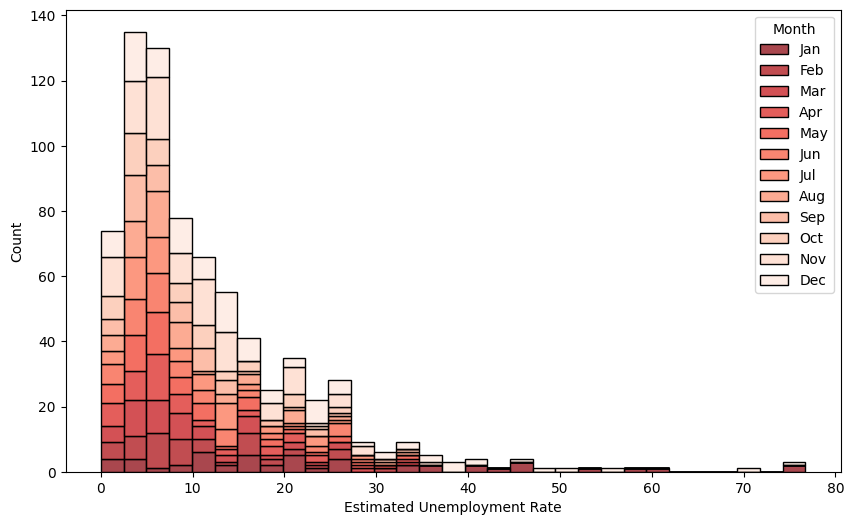

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Estimated Unemployment Rate", hue="Month_name", multiple="stack", palette="Reds")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)

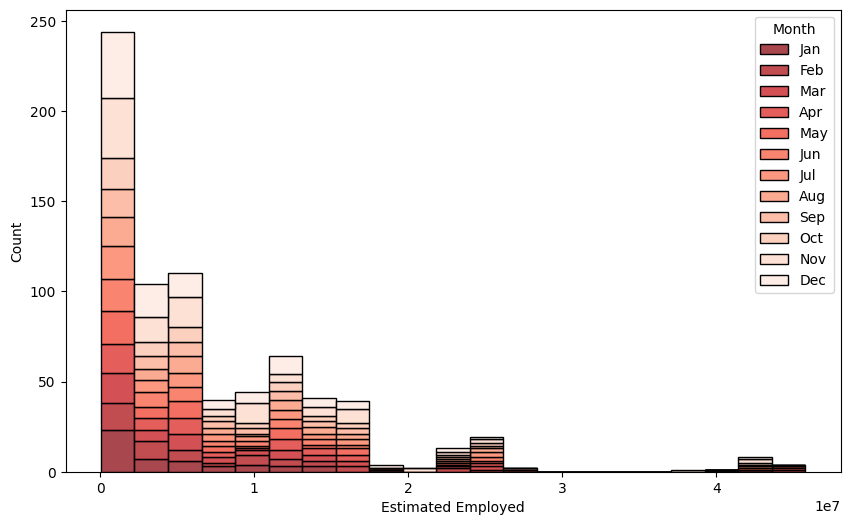

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Estimated Employed", hue="Month_name", multiple="stack", palette="Reds")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)

In [33]:
data = df.groupby(['Month_name'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean()
data=pd.DataFrame(data).reset_index()
data

Month_name  Estimated Unemployment Rate  Estimated Employed  \
0         Apr                    23.641569        5.283320e+06   
1         Aug                     9.637925        7.539815e+06   
2         Dec                     9.497358        7.377388e+06   
3         Feb                     9.964717        7.603996e+06   
4         Jan                     9.950755        7.677344e+06   
5         Jul                     9.033889        7.404425e+06   
6         Jun                    10.553462        7.372280e+06   
7         Mar                    10.700577        7.516581e+06   
8         May                    16.646190        6.666624e+06   
9         Nov                     9.868364        7.273661e+06   
10        Oct                     9.900909        7.298382e+06   
11        Sep                     9.051731        7.739464e+06   

    Estimated Labour Participation Rate  
0                             35.141176  
1                             43.646792  
2                             43.667358  
3                             43.723019  
4                             44.051321  
5                             43.706667  
6                             42.211058  
7                             43.084038  
8                             41.277143  
9                             44.110545  
10                            44.001273  
11                            44.301346

<Axes: xlabel='Estimated Labour Participation Rate', ylabel='Month_name'>

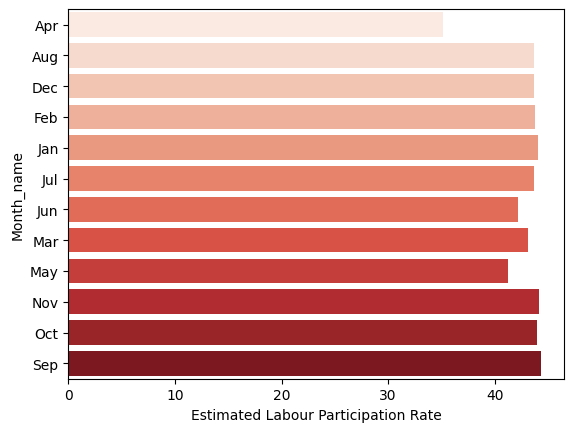

In [34]:
sns.barplot(x="Estimated Labour Participation Rate", y="Month_name",data=data, palette="Reds")

<Axes: xlabel='Estimated Employed', ylabel='Month_name'>

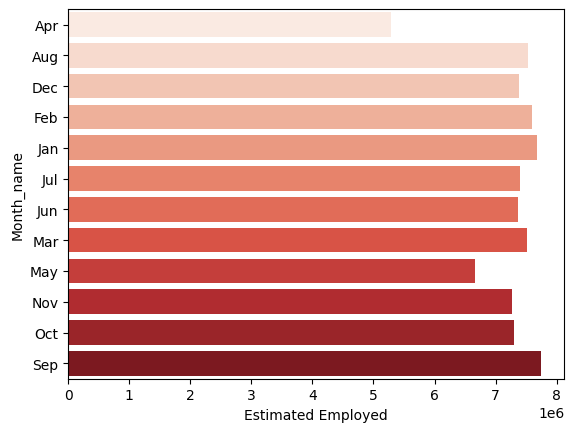

In [35]:
sns.barplot(x="Estimated Employed", y="Month_name",data=data, palette="Reds")

In [50]:
import plotly.io as pio
pio.renderers.default = 'notebook'

month = data.Month_name
unemployment_rate = data['Estimated Unemployment Rate']
labour_participation_rate = data['Estimated Labour Participation Rate']

colors = {'Unemployment Rate':'#aa1016', 
          'Labour Participation Rate':'#f44f39'}

fig = go.Figure()
fig.add_trace(go.Bar(x = month,y = unemployment_rate,name = 'Unemployment Rate', marker_color=colors['Unemployment Rate']))
fig.add_trace(go.Bar(x = month,y = labour_participation_rate,name = 'Labour Participation Rate', marker_color=colors['Labour Participation Rate']))
fig.update_layout(title = {'text':'<b>Estimated Unemployment Rate and Labour Participation Rate by Months</b>', 'x':0.43, 
                           'xanchor': 'center'},
                     xaxis = {'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']}      )
fig.show()

In [51]:
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='<b>Unemployment Rate by States</b>', 
             template='plotly', notched=True, color_discrete_sequence=px.colors.sequential.Reds[::-1])
fig.update_layout(xaxis={'categoryorder': 'total descending'}, title={'x':0.5, 'xanchor': 'center'})
fig.update_xaxes(tickangle=-90)
fig.show()

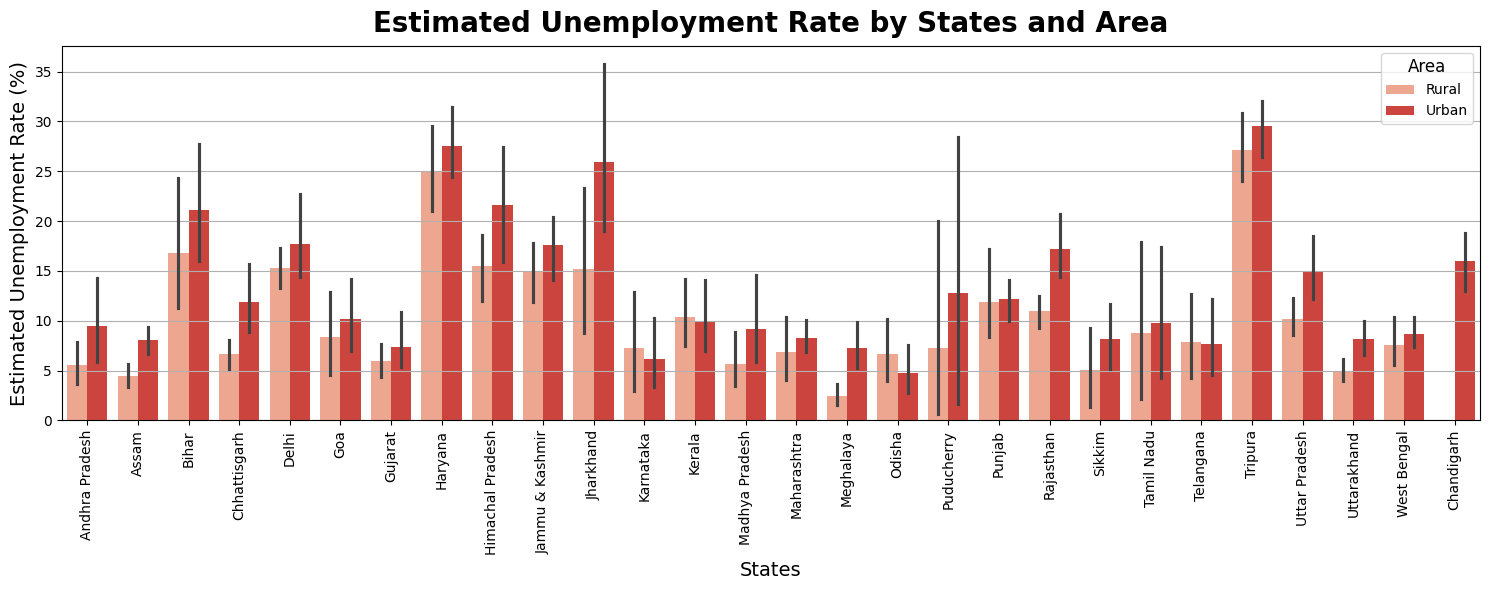

In [52]:
plt.figure(figsize=(15, 6))
sns.barplot(x='States', y='Estimated Unemployment Rate', hue='Area', data=df, palette="Reds")
plt.xlabel('States', fontsize=14)
plt.ylabel('Estimated Unemployment Rate (%)',fontsize=14)
plt.title('Estimated Unemployment Rate by States and Area',fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Area', title_fontsize='12')
plt.tight_layout()
plt.show()

In [53]:
fig = px.bar(df, x='States', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='<b>Unemployment rate across States from May. 2019 to Apr. 2020</b>', height=600,
            color_discrete_sequence = px.colors.sequential.Reds[::-1])

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.update_layout(title={'x':0.5, 'xanchor': 'center'})
fig.update_xaxes(tickangle=-90)

fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 150)
fig['layout']['sliders'][0]['pad']=dict(r= 9, t= 130,)
fig.show()

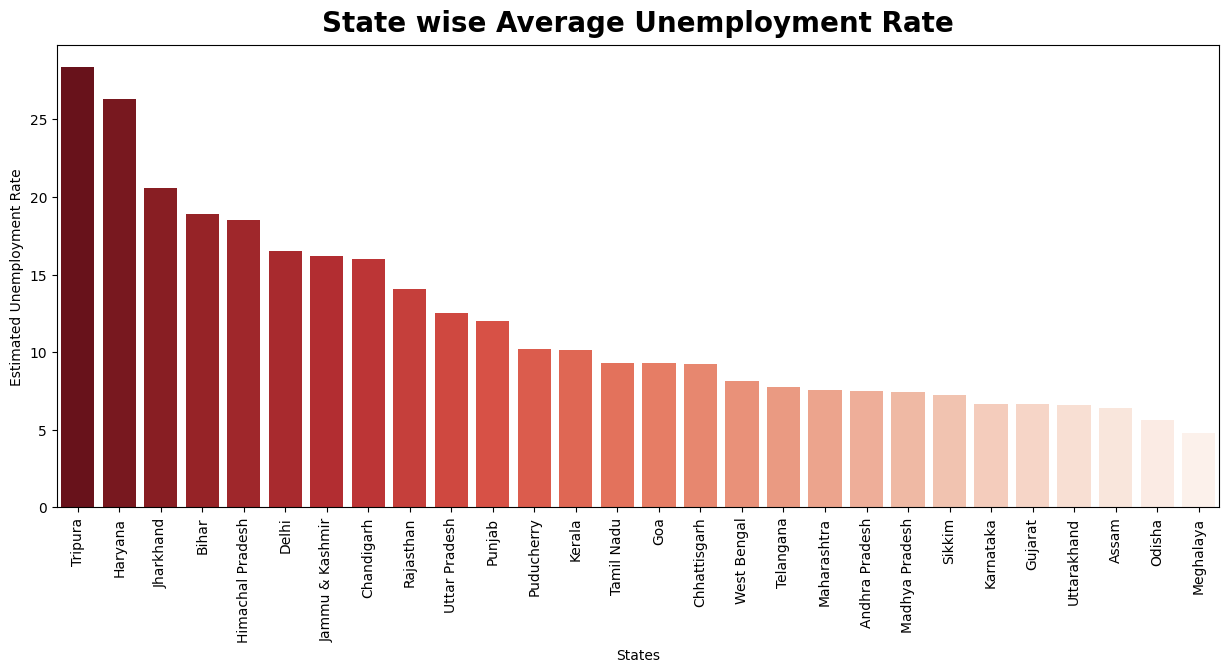

In [54]:
x = df.groupby(["States"])["Estimated Unemployment Rate"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x["Estimated Unemployment Rate"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Unemployment Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

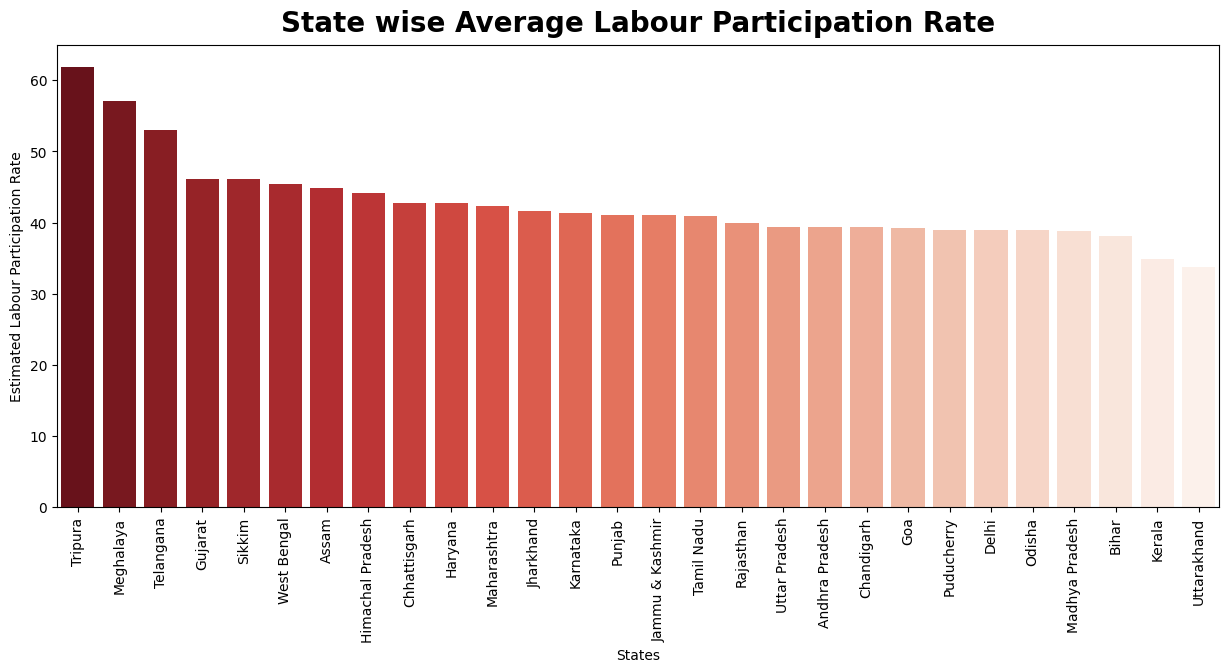

In [55]:
x = df.groupby(["States"])["Estimated Labour Participation Rate"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x["Estimated Labour Participation Rate"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Labour Participation Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

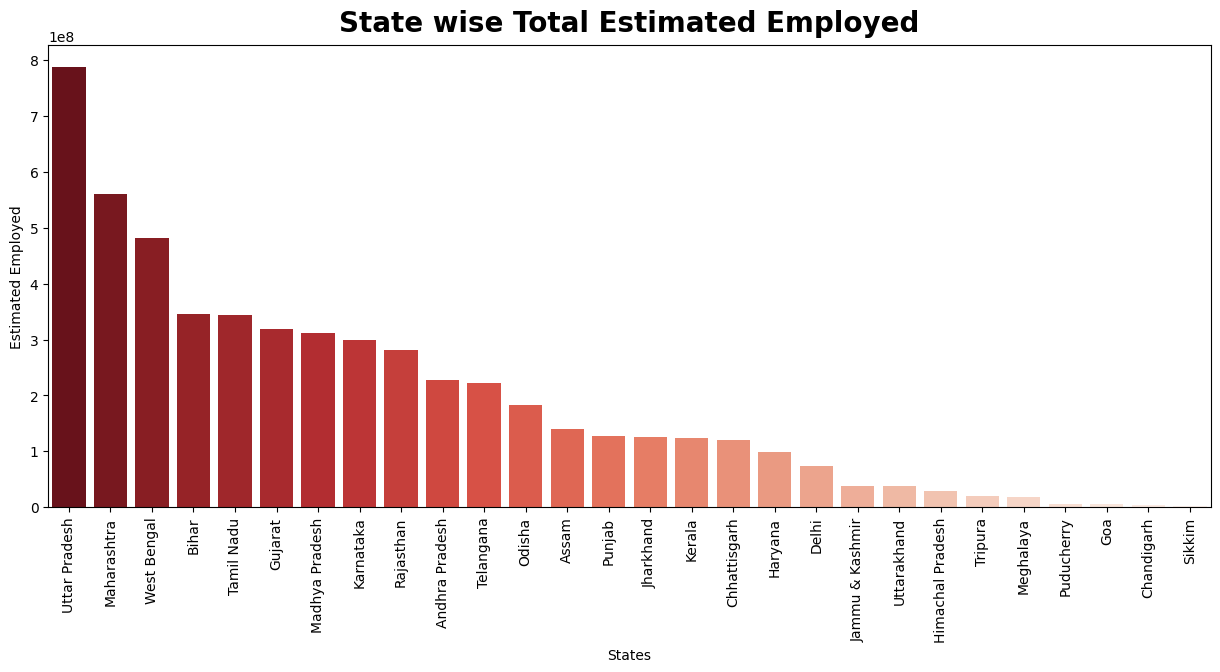

In [56]:
x = df.groupby(["States"])["Estimated Employed"].sum().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x["Estimated Employed"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Total Estimated Employed",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

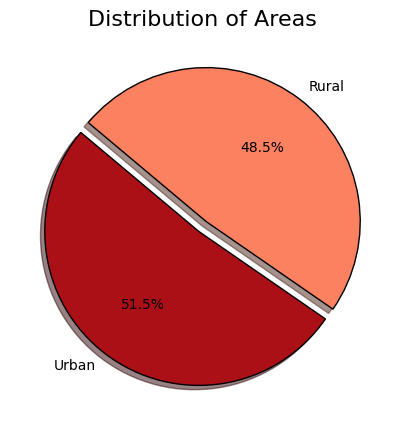

In [57]:
wp = {'linewidth': 1, 'edgecolor': "black"}

fig, ax = plt.subplots(figsize=(8, 5))
area_counts = df['Area'].value_counts()
ax.pie(area_counts, labels=area_counts.index,
        autopct='%1.1f%%', shadow=True, startangle=140,
        explode=(.04, .04), wedgeprops=wp,
        colors = ['#aa1016', '#fc8161'], textprops=dict(color="black"))

ax.set_title("Distribution of Areas",size=16)

plt.show()

<Figure size 1000x800 with 0 Axes>

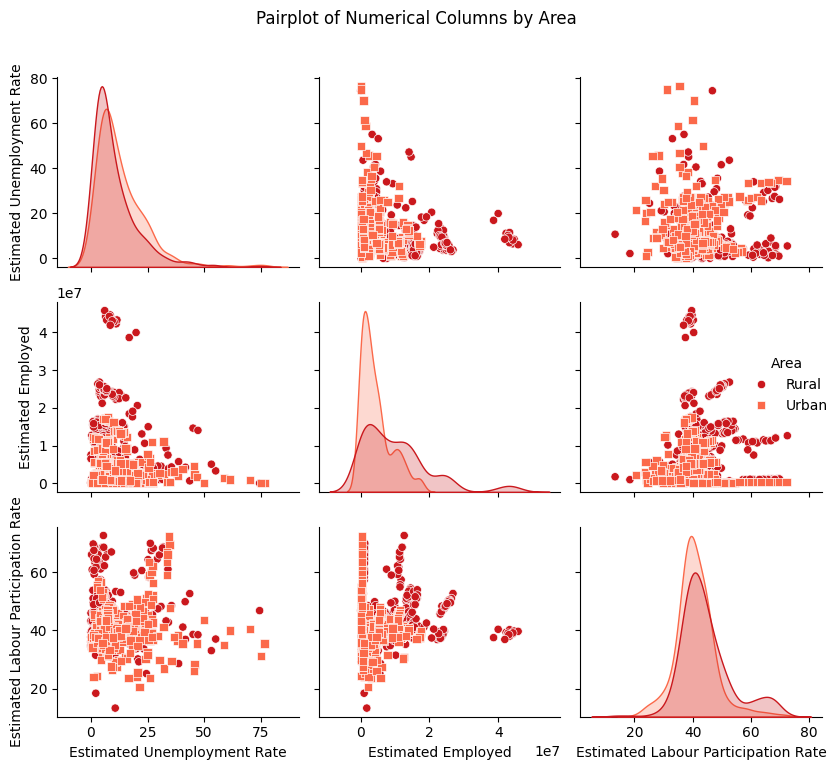

In [58]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=df, vars=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], 
             hue='Area', markers=['o', 's'], palette=sns.color_palette("Reds",3)[::-1])
plt.suptitle('Pairplot of Numerical Columns by Area', y=1.02)
plt.tight_layout()
plt.show()

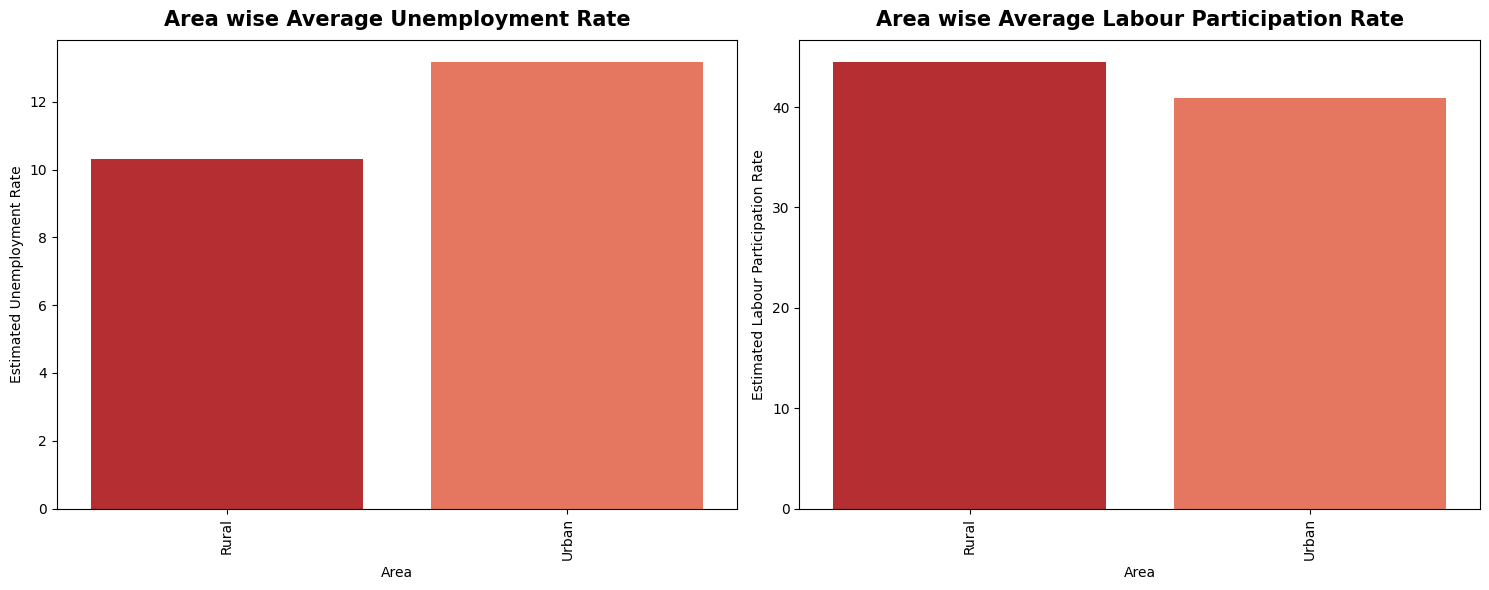

In [59]:
x = df.groupby(["Area"])["Estimated Unemployment Rate"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=x.index,y=x["Estimated Unemployment Rate"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("Area wise Average Unemployment Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)

z = df.groupby(["Area"])["Estimated Labour Participation Rate"].mean().sort_values(ascending=False).to_frame()
plt.subplot(1,2,2)
sns.barplot(x=z.index,y=z["Estimated Labour Participation Rate"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("Area wise Average Labour Participation Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

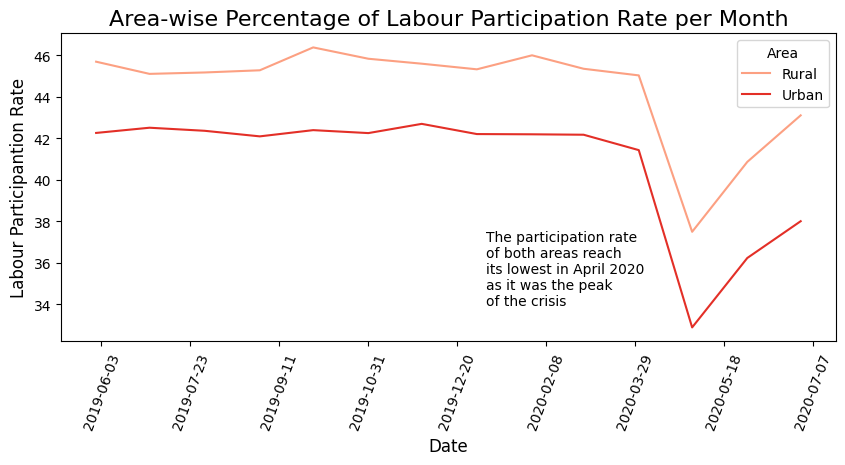

In [60]:
plt.figure(figsize=(10,4))
ax=sns.lineplot(data=df, x='Date', y='Estimated Labour Participation Rate', hue='Area', errorbar= None, palette="Reds")
plt.title('Area-wise Percentage of Labour Participation Rate per Month', size=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Labour Participantion Rate', fontsize=12)
plt.xticks(rotation= 70)
ax.xaxis.set_major_locator(plt.MaxNLocator())
plt.figtext(x= 0.55, y= 0.2 , s= 'The participation rate\nof both areas reach\nits lowest in April 2020\nas it was the peak\nof the crisis')
plt.show()

In [61]:
area_state_data = df.groupby(['Area', 'States'])[['Estimated Unemployment Rate','Estimated Employed',
                                                   'Estimated Labour Participation Rate']].mean().reset_index()
area_state_data.head()

Area          States  Estimated Unemployment Rate  Estimated Employed  \
0  Rural  Andhra Pradesh                     5.526429        1.180859e+07   
1  Rural           Assam                     4.490833        9.716618e+06   
2  Rural           Bihar                    16.770000        2.184369e+07   
3  Rural      Chandigarh                          NaN                 NaN   
4  Rural    Chhattisgarh                     6.628571        6.501684e+06   

   Estimated Labour Participation Rate  
0                            42.963571  
1                            47.072500  
2                            38.417143  
3                                  NaN  
4                            42.442857

In [63]:
sunburst1 = px.sunburst(area_state_data,path=['Area','States'],values='Estimated Unemployment Rate', 
                  color_discrete_sequence = px.colors.sequential.Reds)

sunburst2 = px.sunburst(area_state_data,path=['Area','States'],values='Estimated Employed', 
                        color_discrete_sequence = px.colors.sequential.Reds)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "sunburst"}, {"type": "sunburst"}]], column_widths=[0.8, 0.8],
                    subplot_titles=("<b>Unemployment Rate by States and Area</b>", "<b>Employment Rate by State and Area</b>"))

fig.add_trace(sunburst1.data[0], row=1, col=1)
fig.add_trace(sunburst2.data[0], row=1, col=2)
fig.show()

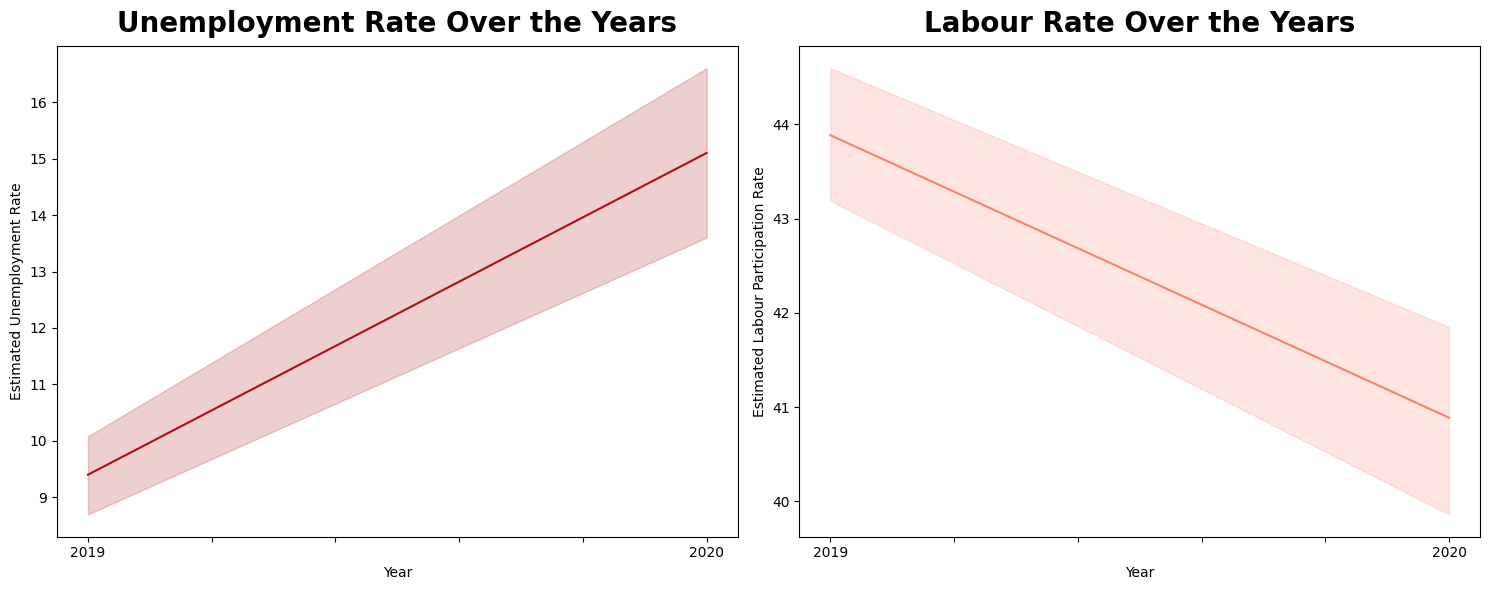

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.lineplot(x=df["Year"],y=df["Estimated Unemployment Rate"],color="#aa1016")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Unemployment Rate Over the Years",fontweight="black",fontsize=20,pad=10)

plt.subplot(1,2,2)
ax = sns.lineplot(x=df["Year"],y=df["Estimated Labour Participation Rate"],color="#fa8072")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Labour Rate Over the Years",fontweight="black",fontsize=20,pad=10)
plt.tight_layout()
plt.show()

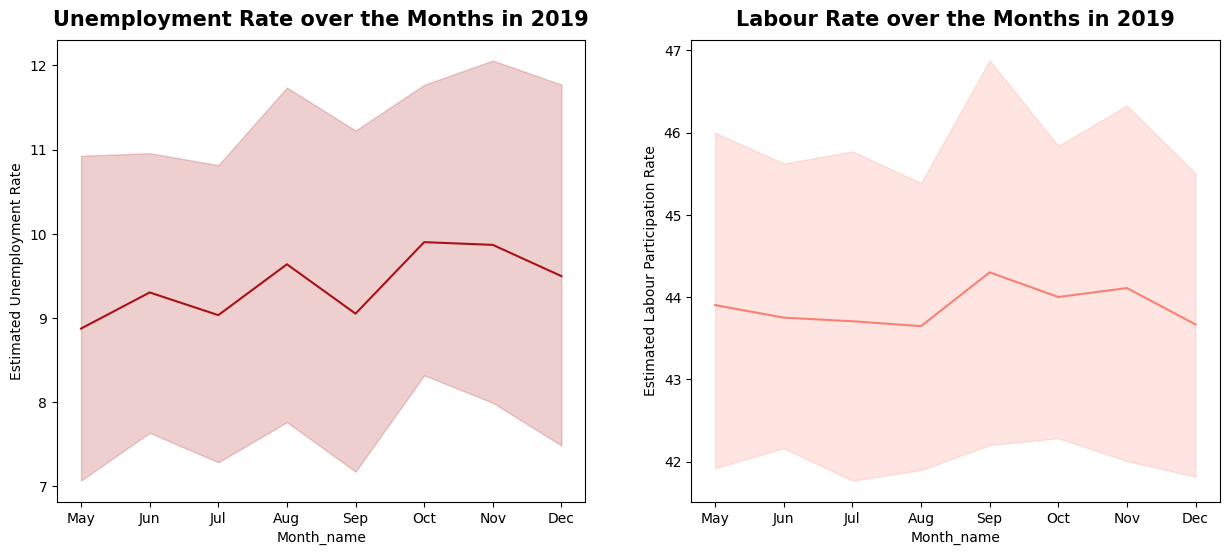

In [65]:
x = df[df["Year"]==2019]
y = df[df["Year"]==2020]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.lineplot(x=x["Month_name"],y=x["Estimated Unemployment Rate"],color="#aa1016")
plt.title("Unemployment Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)

plt.subplot(1,2,2)
sns.lineplot(x=x["Month_name"],y=x["Estimated Labour Participation Rate"],color="#fa8072")
plt.title("Labour Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)
plt.show()

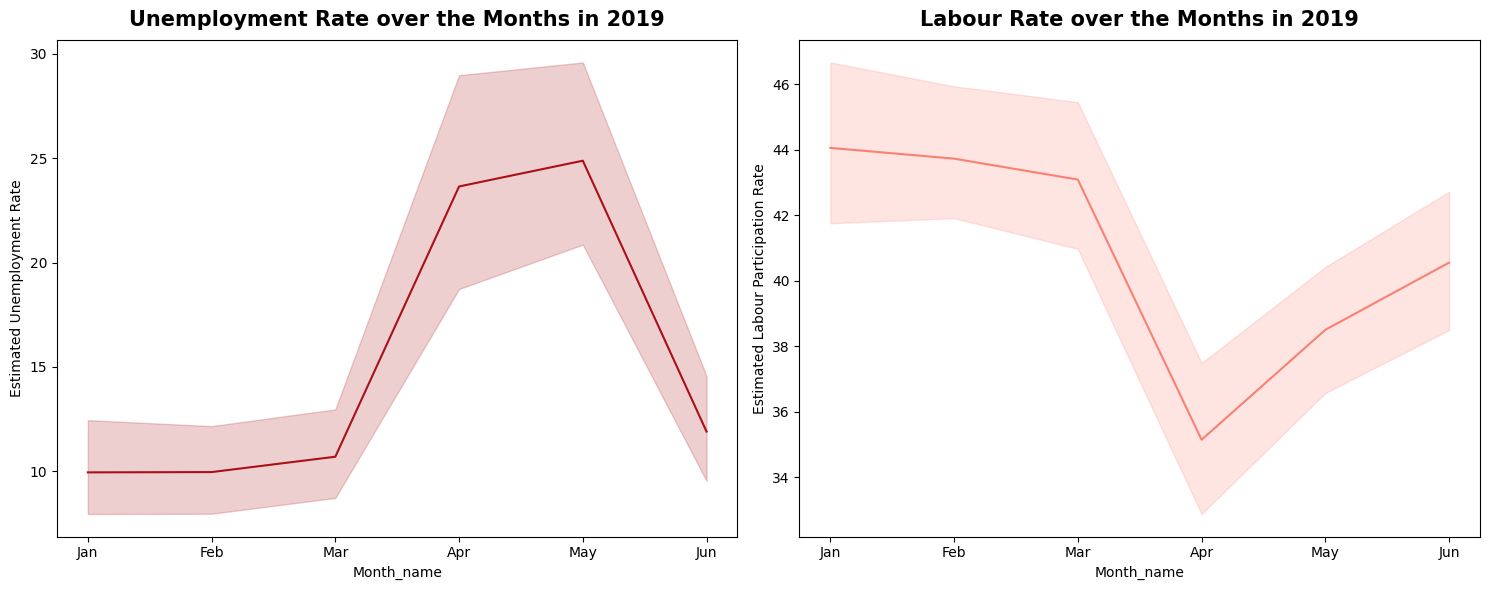

In [66]:
x = df[df["Year"]==2020]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.lineplot(x=x["Month_name"],y=x["Estimated Unemployment Rate"],color="#aa1016")
plt.title("Unemployment Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)

plt.subplot(1,2,2)
sns.lineplot(x=x["Month_name"],y=x["Estimated Labour Participation Rate"],color="#fa8072")
plt.title("Labour Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)
plt.tight_layout()
plt.show()

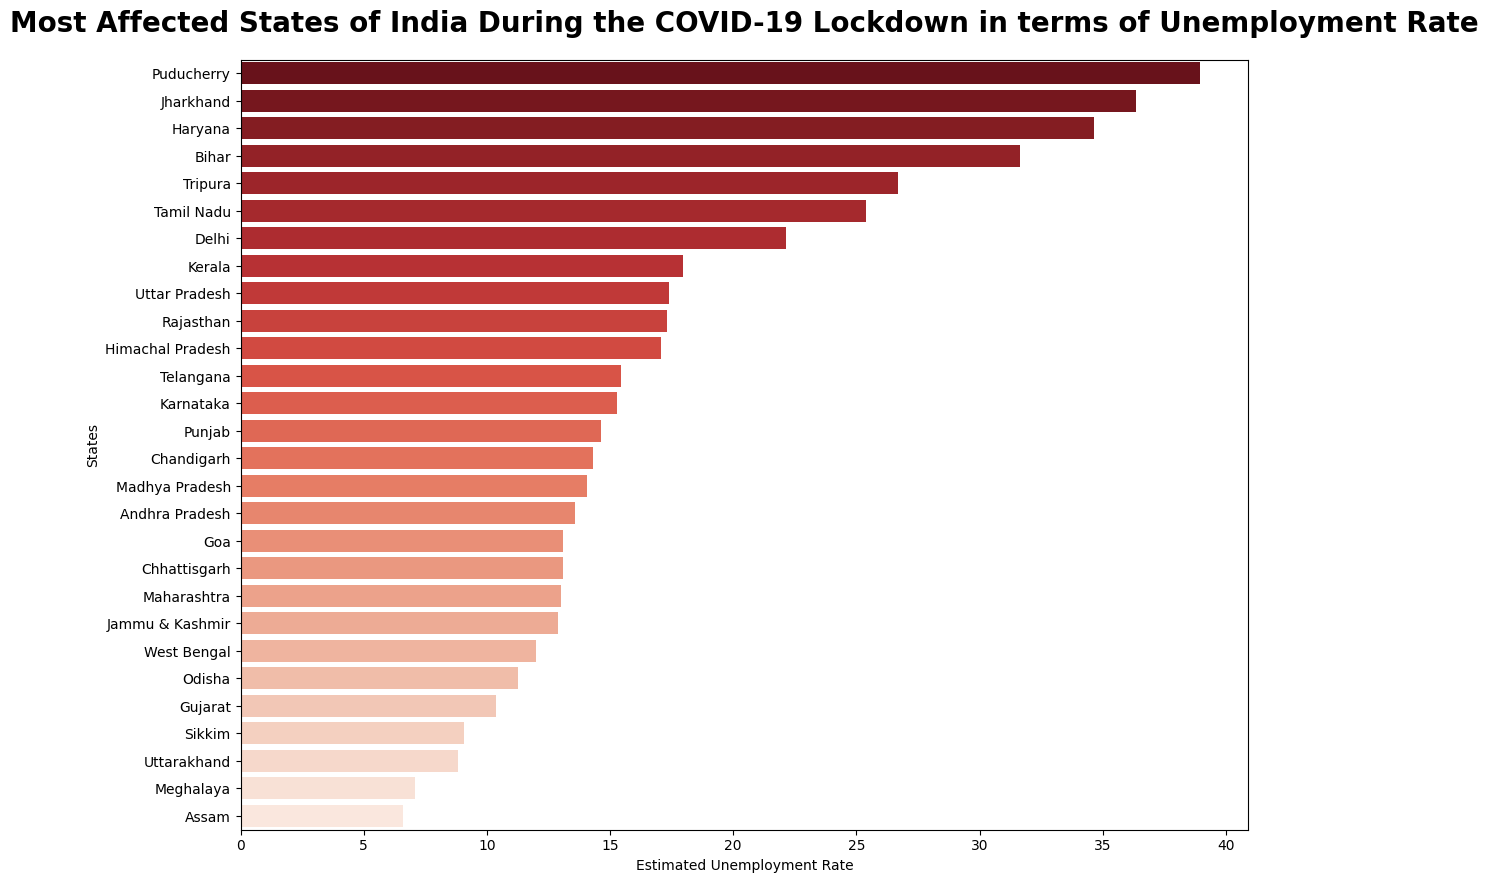

In [67]:
x = df[(df["Year"]==2020) & ((df["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Unemployment Rate"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(13,10))
sns.barplot(x=z["Estimated Unemployment Rate"],y=z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States of India During the COVID-19 Lockdown in terms of Unemployment Rate",
          fontweight="black",fontsize=20,pad=20)
plt.show()

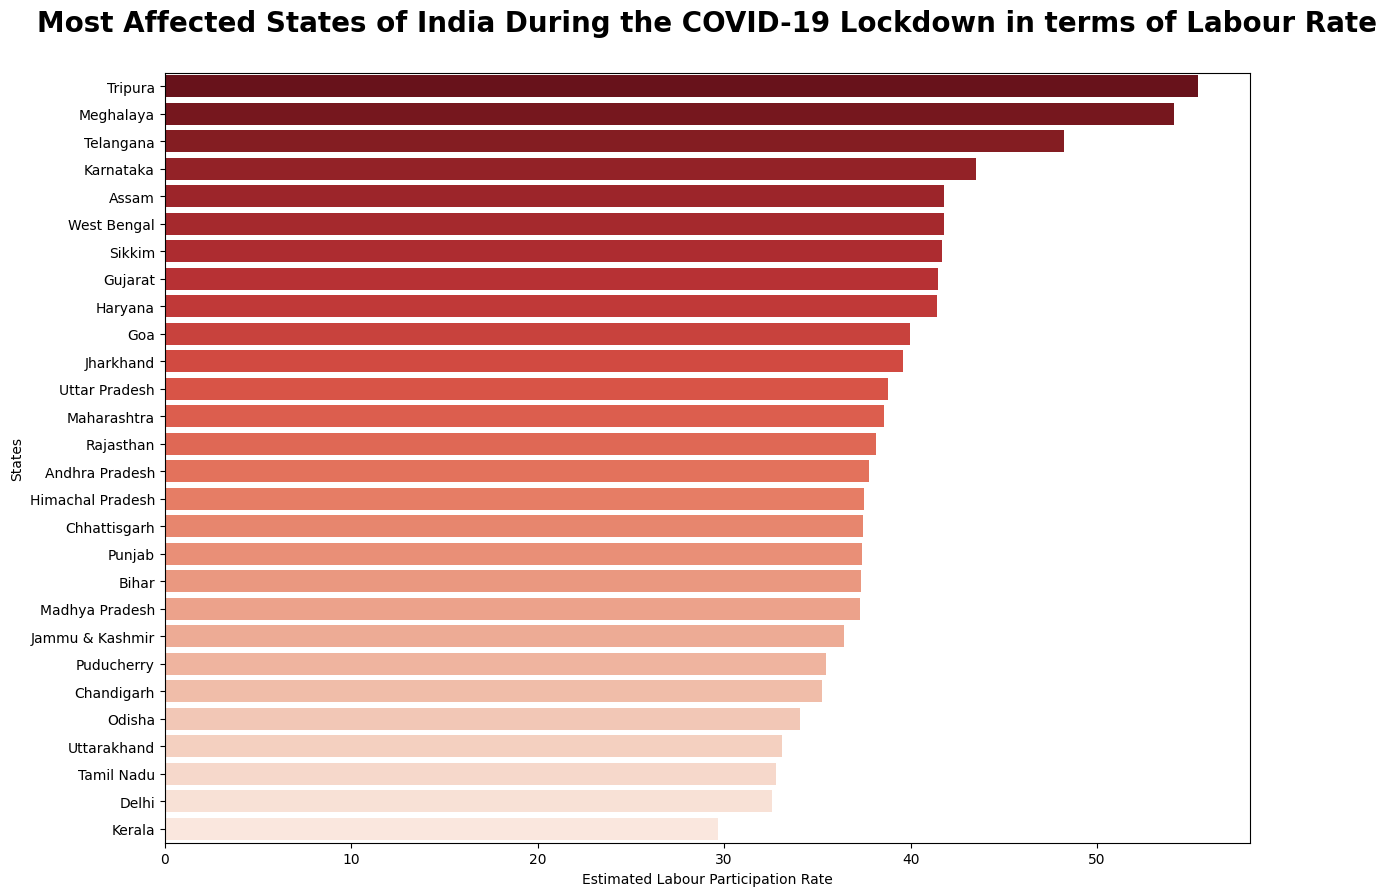

In [68]:
x = df[(df["Year"]==2020) & ((df["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Labour Participation Rate"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(14,10))
sns.barplot(x=z["Estimated Labour Participation Rate"],y=z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States of India During the COVID-19 Lockdown in terms of Labour Rate",
          fontweight="black",fontsize=20,pad=30)
plt.show()

In [69]:
df_ld = df.copy()

In [70]:
start_date = df['Date'].max()
start_date

Timestamp('2020-06-30 00:00:00')

In [71]:
end_date = df['Date'].min()
end_date

Timestamp('2019-05-31 00:00:00')

In [72]:
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-24')
df = df.loc[mask]

In [73]:
mask = (df_ld['Date'] >= '2020-03-25')
df_ld = df_ld.loc[mask]

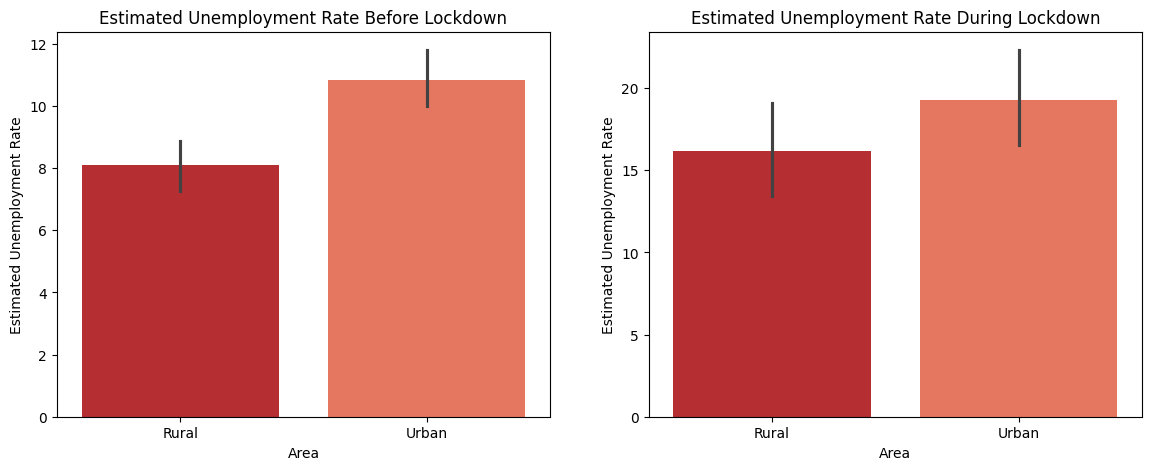

In [74]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

sns.barplot(x='Area', y='Estimated Unemployment Rate', data=df, palette=sns.color_palette("Reds",3)[::-1])

plt.xlabel("Area", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)
plt.subplot(1, 2, 2)

sns.barplot(x='Area', y='Estimated Unemployment Rate', data=df_ld, palette=sns.color_palette("Reds",3)[::-1])

plt.xlabel("Area", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

plt.show()

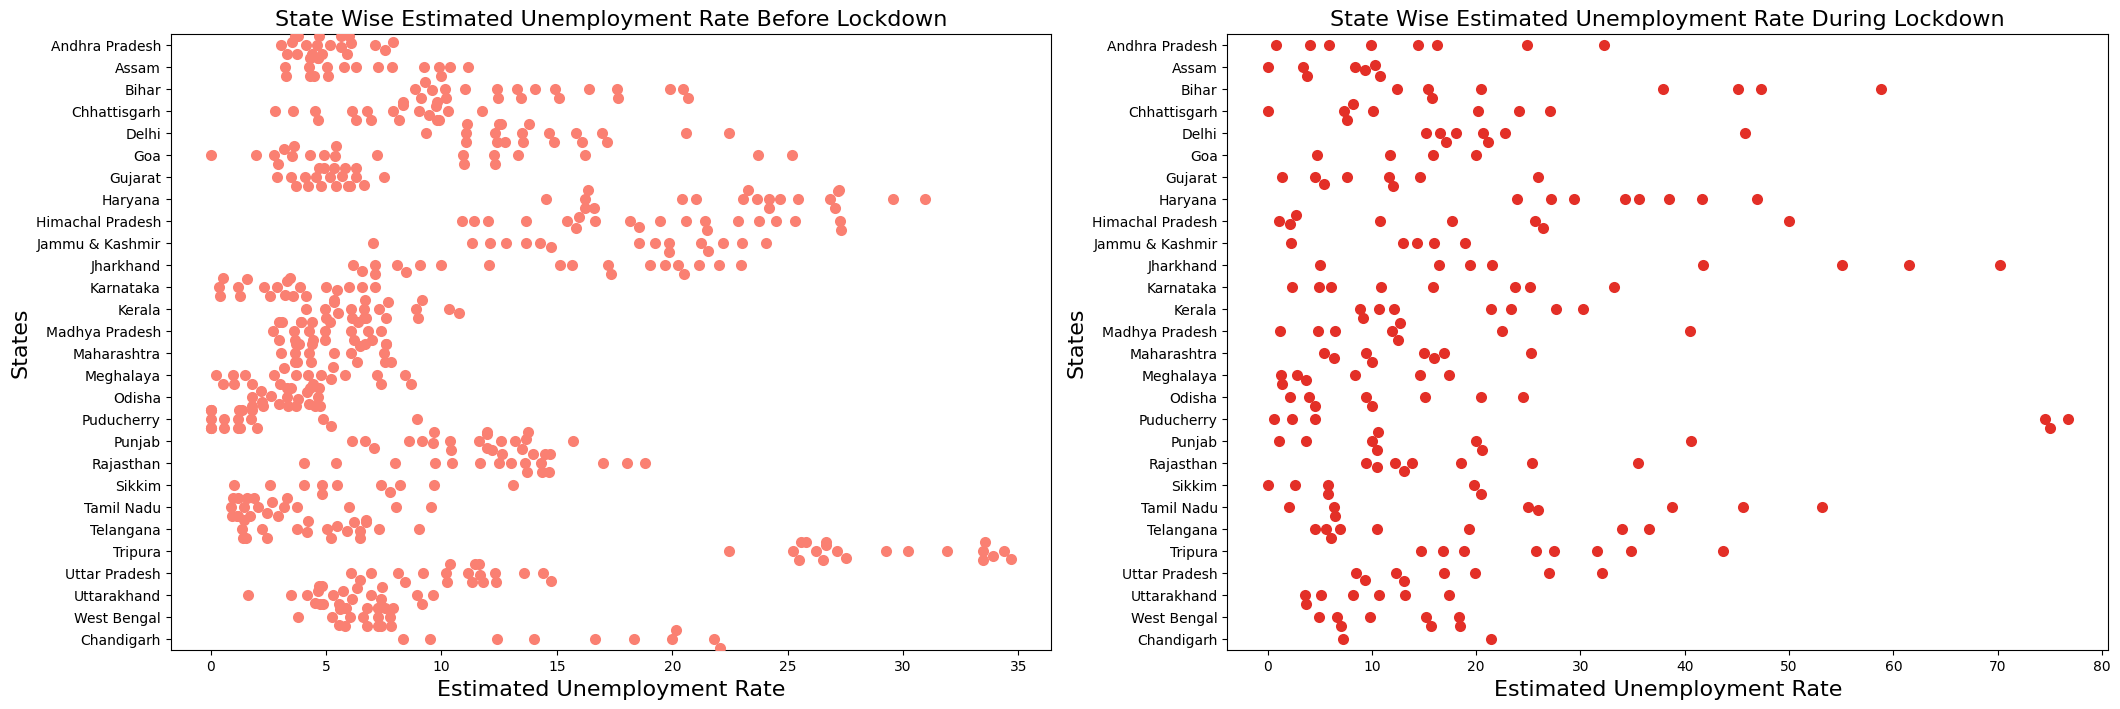

In [75]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8, color="#fa8072")

plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)
plt.subplot(1, 2, 2)
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8, color= '#e32f27')

plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

plt.show()

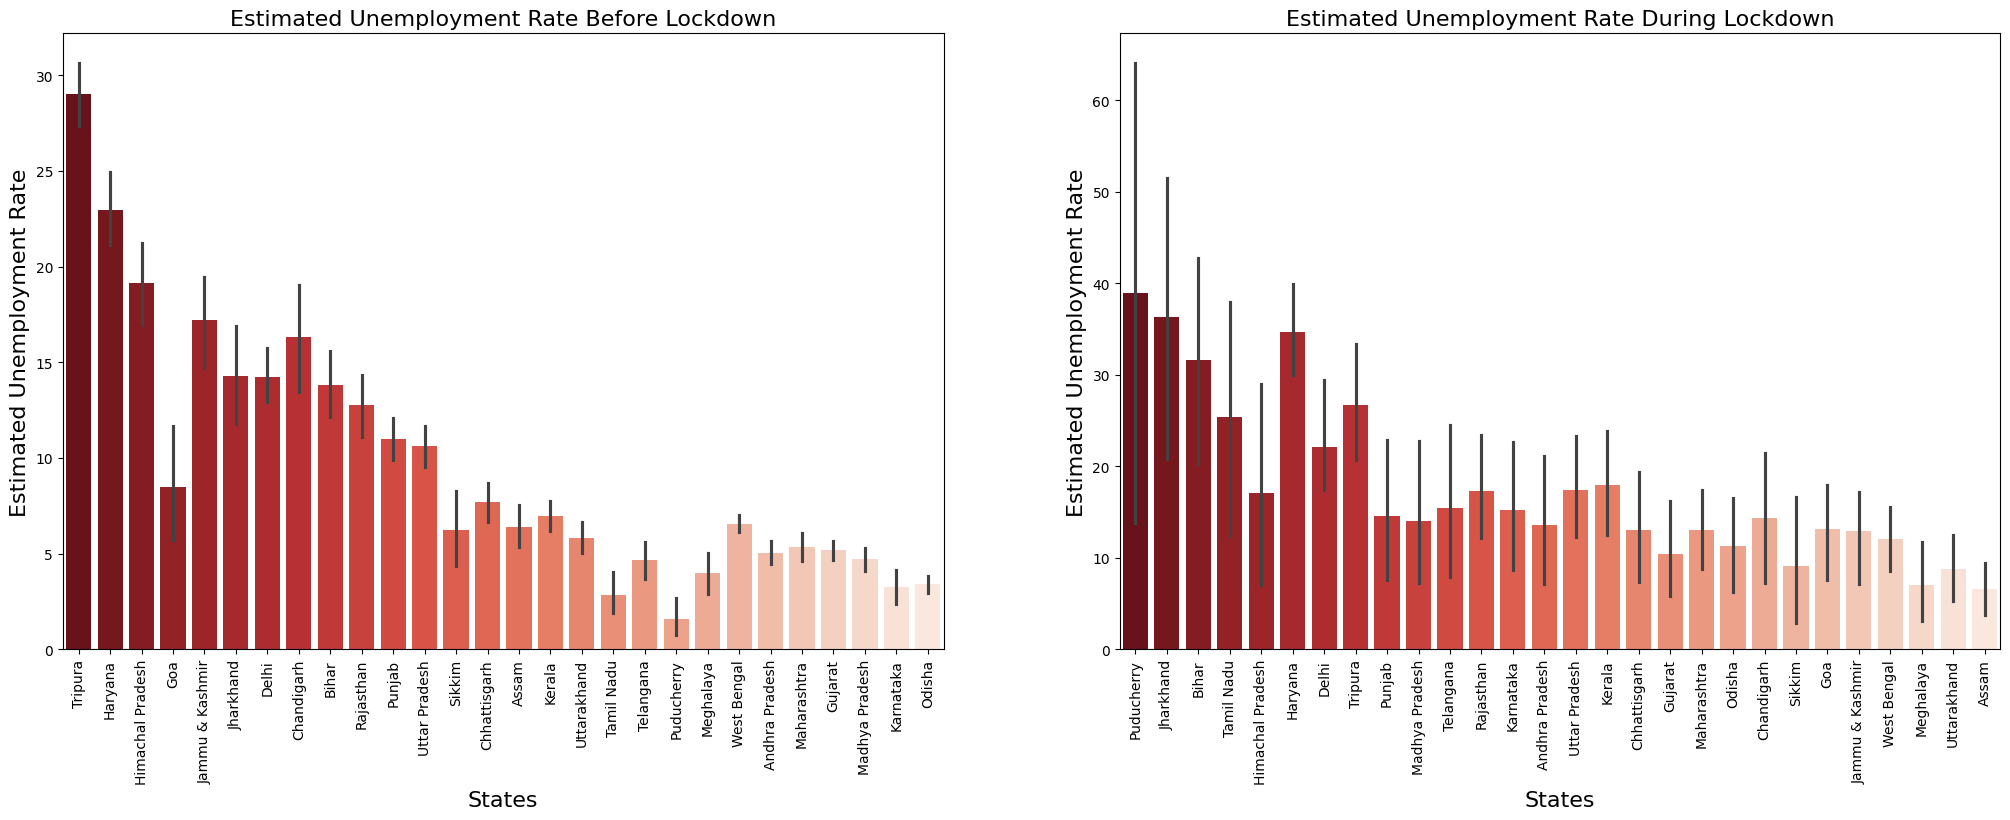

In [76]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate",
           palette=sns.color_palette("Reds",30)[::-1])
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)
plt.subplot(1, 2, 2)
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate",
           palette=sns.color_palette("Reds",30)[::-1])
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

plt.show()

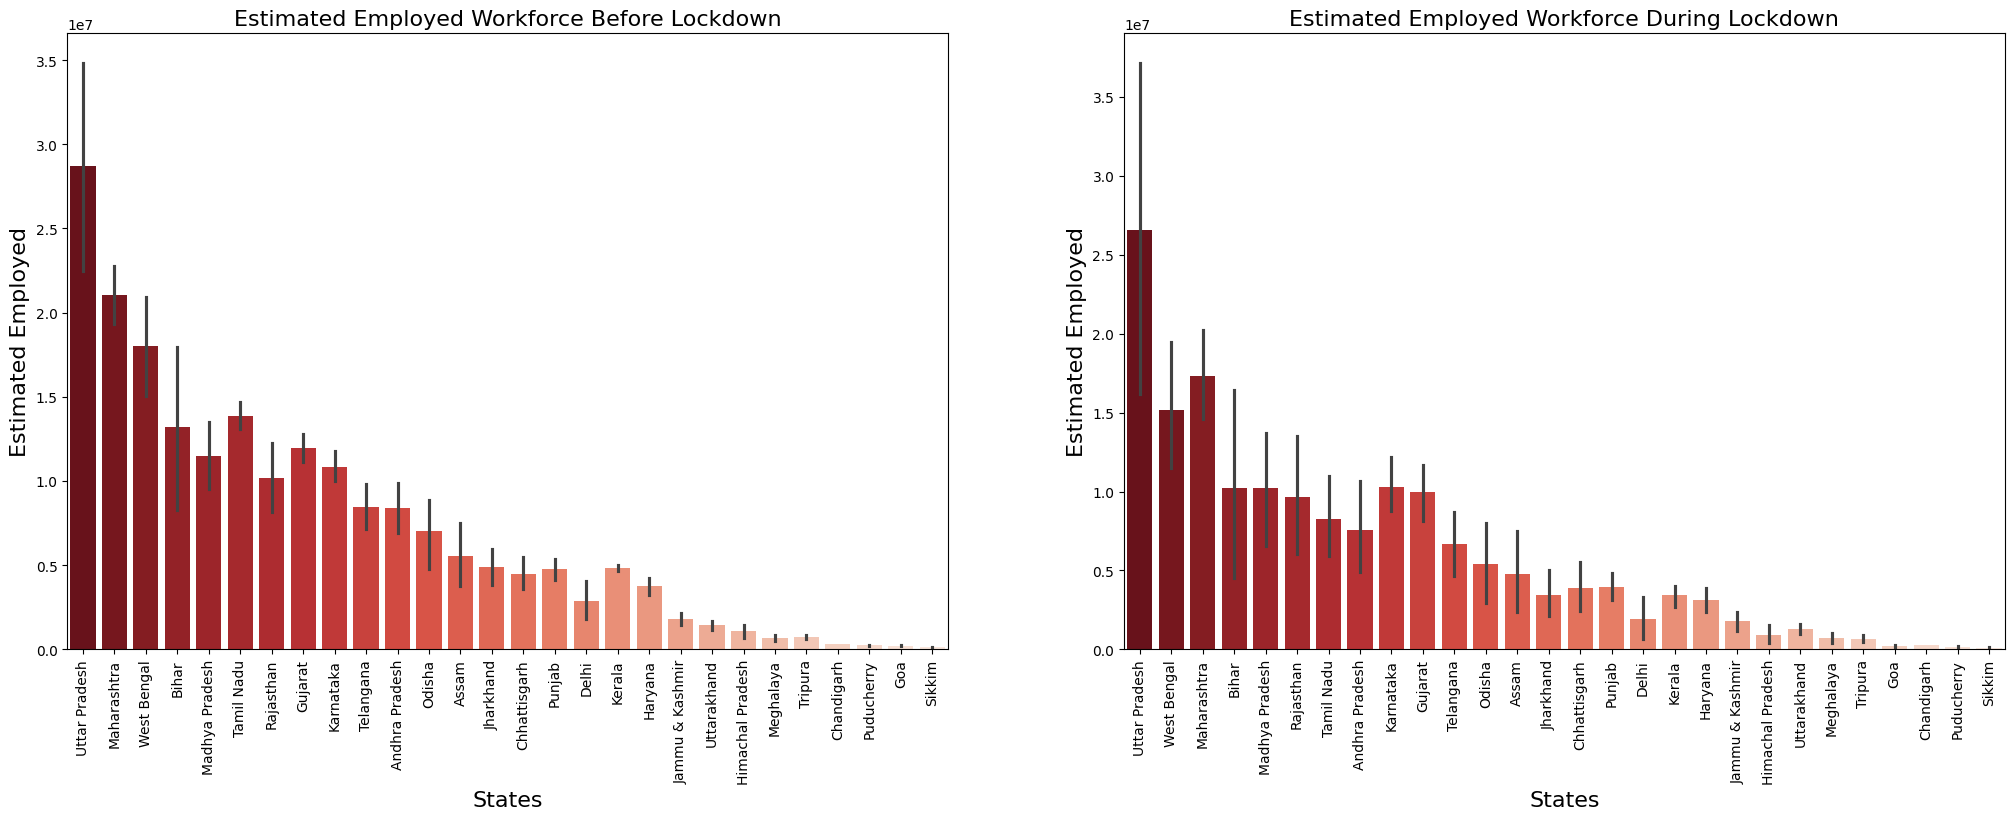

In [77]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

sns.barplot(data=df.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed",
           palette=sns.color_palette("Reds",30)[::-1])

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)
plt.subplot(1, 2, 2)
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed", 
           palette=sns.color_palette("Reds",30)[::-1])

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

plt.show()

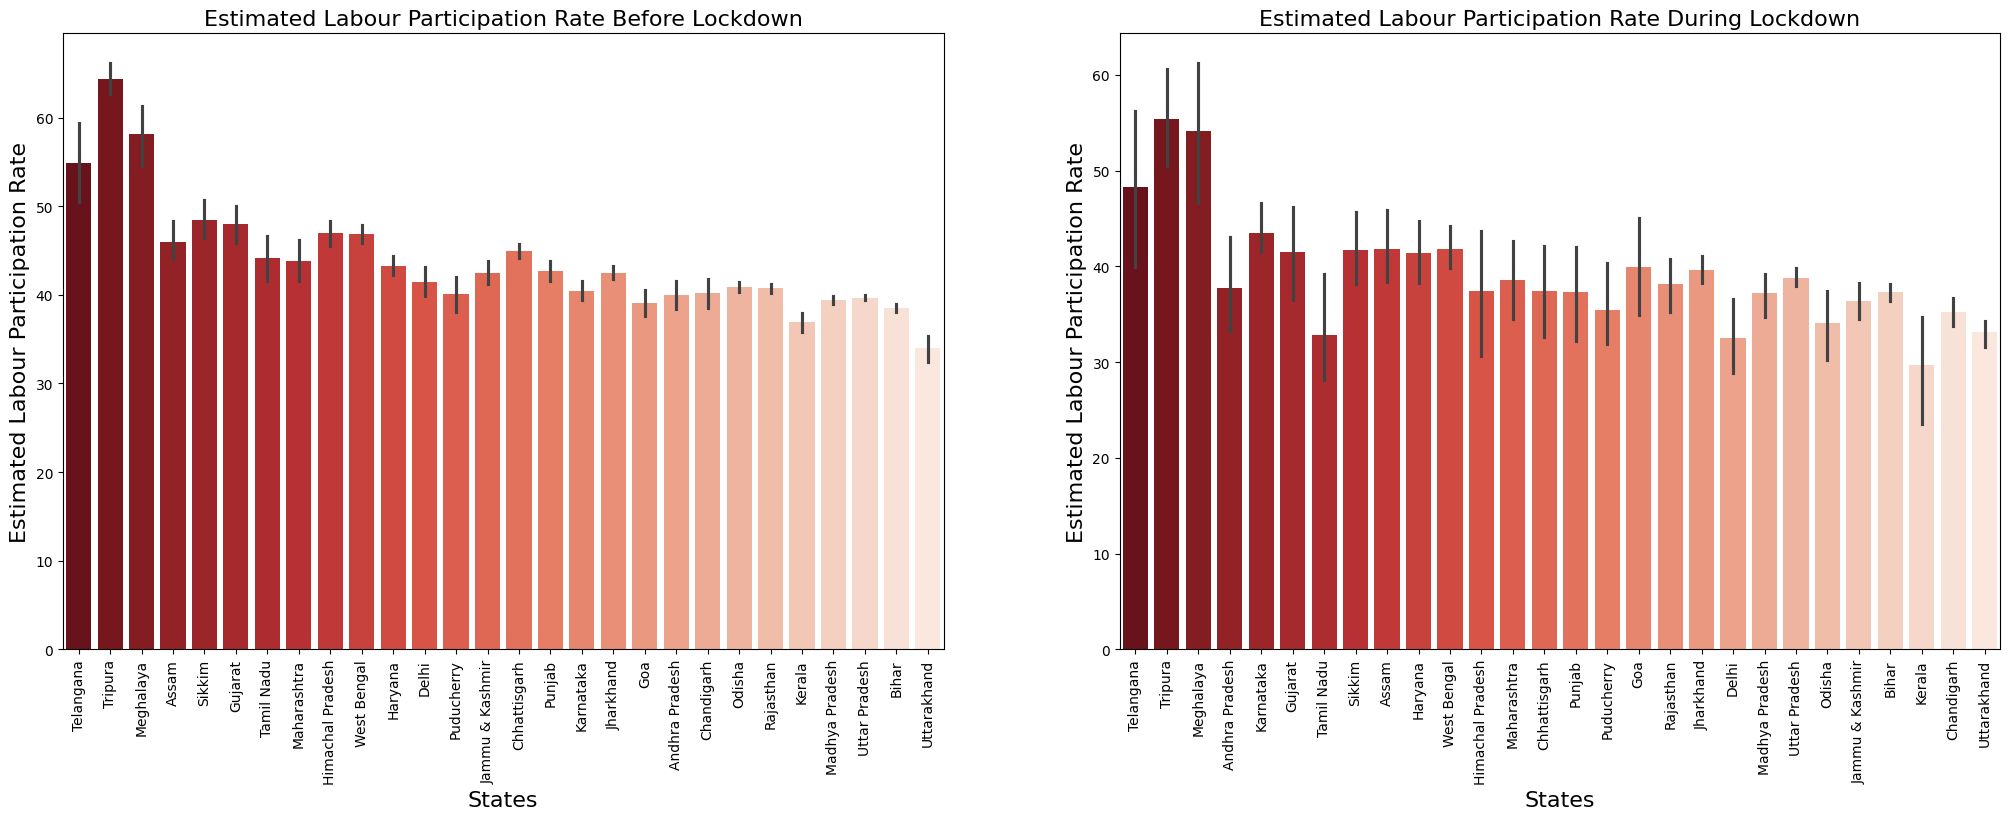

In [78]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", 
            y="Estimated Labour Participation Rate", palette=sns.color_palette("Reds",30)[::-1])

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)
plt.subplot(1, 2, 2)
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", 
            y="Estimated Labour Participation Rate", palette=sns.color_palette("Reds",30)[::-1])

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

plt.show()

In [79]:
before_ld = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

during_ld = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

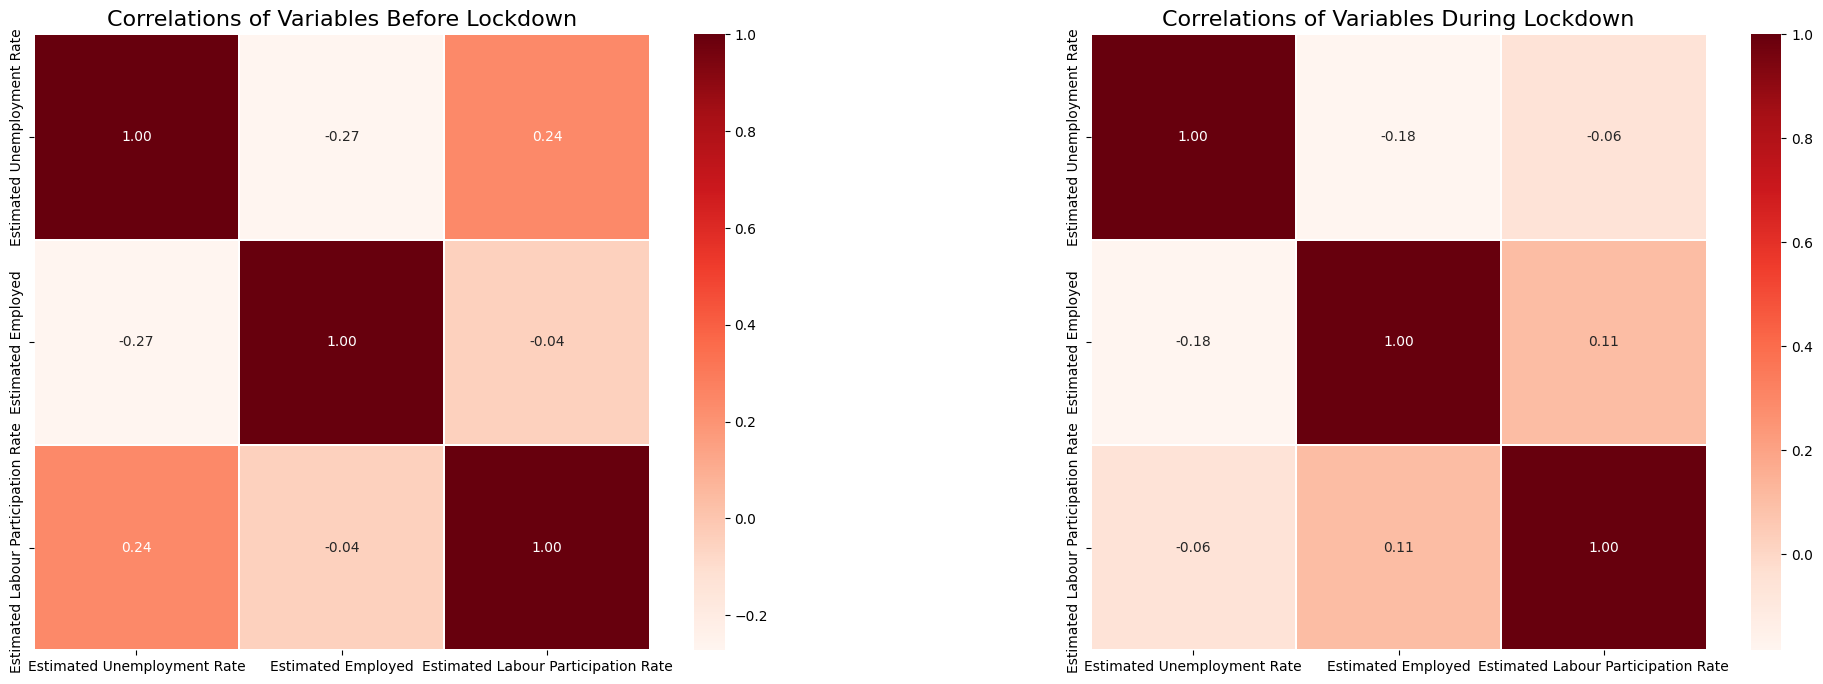

In [80]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

sns.heatmap(before_ld.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap="Reds")

plt.subplot(1, 2, 2)
plt.title("Correlations of Variables During Lockdown", fontsize=16)

sns.heatmap(during_ld.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap="Reds")

plt.show()